DESARROLLO PARTE 1

Introducción y descripción de los datos

Breve descripción del dataset: El dataset contiene registros de ventas de vehículos realizados en distintas provincias argentinas. Cada fila representa una transacción e incluye información sobre la fecha, ubicación, tipo de comprador, características del vehículo y variables económicas como precio en dólares y valor del dólar al momento de la venta.

In [ ]:
import pandas as pd

df = pd.read_csv('ProyectoVentaVehiculos+Milanesio.csv', delimiter=';')

datos = {
    "Variable": [
        "ID_Venta", "Fecha_Venta", "Provincia", "Tipo_Comprador", "Tipo_Empresa",
        "Vehiculo_Nuevo", "Marca", "Tipo_Vehiculo", "Kilometraje", "Precio_USD",
        "Valor_Dolar", "Modelo_Vehiculo", "Consumo_Litros_100km",
        "Costo_Mantenimiento_Anual", "Color"
    ],
    "Descripción": [
        "Identificador único de cada venta.",
        "Fecha en la que se concretó la venta del vehículo.",
        "Provincia argentina donde se realizó la venta.",
        "Indica si el comprador es particular o empresa.",
        "Categoría de la empresa (si corresponde).",
        "Indica si el vehículo es nuevo (SI/No).",
        "Marca del vehículo vendido.",
        "Clasificación general del vehículo (Auto, SUV, Camioneta, etc.).",
        "Cantidad de kilómetros recorridos por el vehículo (0 si es nuevo).",
        "Precio de venta del vehículo en dólares.",
        "Cotización del dólar en el momento de la venta.",
        "Año de modelo del vehículo.",
        "Consumo de combustible estimado.",
        "Costo anual estimado de mantenimiento del vehículo.",
        "Color del vehículo vendido."
    ]
}


tabla_descriptiva = pd.DataFrame(datos)
tabla_descriptiva

,Variable,Descripción
0,ID_Venta,Identificador único de cada venta.
1,Fecha_Venta,Fecha en la que se concretó la venta del vehíc...
2,Provincia,Provincia argentina donde se realizó la venta.
3,Tipo_Comprador,Indica si el comprador es particular o empresa.
4,Tipo_Empresa,Categoría de la empresa (si corresponde).
5,Vehiculo_Nuevo,Indica si el vehículo es nuevo (SI/No).
6,Marca,Marca del vehículo vendido.
7,Tipo_Vehiculo,"Clasificación general del vehículo (Auto, SUV,..."
8,Kilometraje,Cantidad de kilómetros recorridos por el vehíc...
9,Precio_USD,Precio de venta del vehículo en dólares.


0. Etapa 0: Importando el dataset elegido, correspondiente a la venta de vehiculos en Argentina

In [9]:
import pandas as pd

df = pd.read_csv('ProyectoVentaVehiculos+Milanesio.csv', delimiter=';')
df.head()

,ID_Venta,Fecha_Venta,Provincia,Tipo_Comprador,Tipo_Empresa,Vehiculo_Nuevo,Marca,Tipo_Vehiculo,Kilometraje,Precio_USD,Valor_Dolar,Modelo_Vehiculo,Consumo_Litros_100km,Costo_Mantenimiento_Anual,Color
0,1,18/3/2022,Tucuman,Particular,NaN,SI,Mercedes-Benz,Trafic,0,"76177,50483","131,6969387",2022,"21,83582946","3871,603355",Gris
1,2,21/9/2022,Cordoba,Particular,NaN,No,Toyota,SUV,237740,"59373,04844","129,0038998",2005,"9,974152895","3218,352379",Gris
2,3,10/3/2022,Santa Fe,Particular,NaN,No,Mercedes-Benz,Trafic,108993,"73487,05255","156,5218273",2005,"11,16530746","532,2744038",Gris
3,4,5/8/2023,Tucuman,Particular,NaN,No,Toyota,Auto,209384,"13798,06515","120,8424526",2016,"20,12482988","836,8467469",Gris
4,5,15/12/2023,Misiones,Particular,NaN,No,Ford,Camion,103248,"24093,02155","177,7582825",2016,"7,107215815","4859,986977",Gris


1. Etapa 1:  Desarrollo preliminar - Conociendo el dataset

In [10]:
print("Filas y columnas:", df.shape)

Filas y columnas: (2000, 15)


In [11]:
print("Tipos de datos por columna:")
print(df.dtypes)

Tipos de datos por columna:
ID_Venta                      int64
Fecha_Venta                  object
Provincia                    object
Tipo_Comprador               object
Tipo_Empresa                 object
Vehiculo_Nuevo               object
Marca                        object
Tipo_Vehiculo                object
Kilometraje                   int64
Precio_USD                   object
Valor_Dolar                  object
Modelo_Vehiculo               int64
Consumo_Litros_100km         object
Costo_Mantenimiento_Anual    object
Color                        object
dtype: object


In [12]:
# Convertir columna de fecha
df['Fecha_Venta'] = pd.to_datetime(df['Fecha_Venta'], dayfirst=True, errors='coerce')

# Convertir columnas numéricas con separador decimal como coma a float
columnas_a_convertir = [
    'Precio_USD',
    'Valor_Dolar',
    'Consumo_Litros_100km',
    'Costo_Mantenimiento_Anual'
]

for col in columnas_a_convertir:
    df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificamos los nuevos tipos de datos
print("Tipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
ID_Venta                              int64
Fecha_Venta                  datetime64[ns]
Provincia                            object
Tipo_Comprador                       object
Tipo_Empresa                         object
Vehiculo_Nuevo                       object
Marca                                object
Tipo_Vehiculo                        object
Kilometraje                           int64
Precio_USD                          float64
Valor_Dolar                         float64
Modelo_Vehiculo                       int64
Consumo_Litros_100km                float64
Costo_Mantenimiento_Anual           float64
Color                                object
dtype: object


In [13]:
print("Registros nulos en el dataset",df.isnull().sum())

Registros nulos en el dataset ID_Venta                        0
Fecha_Venta                     0
Provincia                       0
Tipo_Comprador                  0
Tipo_Empresa                 1405
Vehiculo_Nuevo                  0
Marca                           0
Tipo_Vehiculo                   0
Kilometraje                     0
Precio_USD                      0
Valor_Dolar                     0
Modelo_Vehiculo                 0
Consumo_Litros_100km            0
Costo_Mantenimiento_Anual       0
Color                           0
dtype: int64


In [ ]:
#Obs. Se volvio a correr el codigo luego de completar los registros vacios. Razon por la que se obtiene un dataset sin registros vacios.

In [14]:
#Debido a que en los tipos de compradores que son "Particular" tienen registros vacios en "Tipo_empresa", 
#se procede a completar los valores vacios por "No Aplica".

df['Tipo_Empresa'] = df['Tipo_Empresa'].fillna('No Aplica')
print("Registros nulos en tipos de empresas:",df['Tipo_Empresa'].isnull().sum())

Registros nulos en tipos de empresas: 0


In [15]:
print("Años de venta registrados:", df['Fecha_Venta'].dt.year.dropna().unique())

Años de venta registrados: [2022 2023]


In [16]:
print("Provincias en las que se ha vendido:", df['Provincia'].unique())

Provincias en las que se ha vendido: ['Tucuman' 'Cordoba' 'Santa Fe' 'Misiones' 'Salta' 'Buenos Aires'
 'Mendoza' 'Entre Rios']


In [17]:
print("Marcas que se han vendido:", df['Marca'].unique())

Marcas que se han vendido: ['Mercedes-Benz' 'Toyota' 'Ford' 'Nissan' 'Chevrolet' 'Renault' 'Fiat'
 'Volkswagen']


In [18]:
print("Tipos de vehículo:", df['Tipo_Vehiculo'].unique())

Tipos de vehículo: ['Trafic' 'SUV' 'Auto' 'Camion' 'Camioneta' 'Moto']


In [19]:
min_dolar = df['Valor_Dolar'].min()
prom_dolar = df['Valor_Dolar'].mean()
max_dolar = df['Valor_Dolar'].max()

print(f"Valor Dólar - Mínimo: {min_dolar:.2f}")
print(f"Valor Dólar - Promedio: {prom_dolar:.2f}")
print(f"Valor Dólar - Máximo: {max_dolar:.2f}")

Valor Dólar - Mínimo: 80.49
Valor Dólar - Promedio: 148.90
Valor Dólar - Máximo: 199.96


In [20]:
min_consumo = df['Consumo_Litros_100km'].min()
prom_consumo = df['Consumo_Litros_100km'].mean()
max_consumo = df['Consumo_Litros_100km'].max()

print(f"Consumo (L/100km) - Mínimo: {min_consumo:.2f} ")
print(f"Consumo (L/100km) - Promedio: {prom_consumo:.2f} ")
print(f"Consumo (L/100km) - Máximo: {max_consumo:.2f} ")

Consumo (L/100km) - Mínimo: 5.00 
Consumo (L/100km) - Promedio: 15.05 
Consumo (L/100km) - Máximo: 24.99 


In [21]:
min_mantenimiento = df['Costo_Mantenimiento_Anual'].min()
prom_mantenimiento = df['Costo_Mantenimiento_Anual'].mean()
max_mantenimiento = df['Costo_Mantenimiento_Anual'].max()

print(f"Costo Mantenimiento Anual - Mínimo: {min_mantenimiento:.2f}")
print(f"Costo Mantenimiento Anual - Promedio: {prom_mantenimiento:.2f}")
print(f"Costo Mantenimiento Anual - Máximo: {max_mantenimiento:.2f}")

Costo Mantenimiento Anual - Mínimo: 506.66
Costo Mantenimiento Anual - Promedio: 2779.06
Costo Mantenimiento Anual - Máximo: 4999.90


In [22]:
# Filtrar vehículos usados
vehiculos_usados = df[df['Vehiculo_Nuevo'] == 'No']

min_km = vehiculos_usados['Kilometraje'].min()
prom_km = vehiculos_usados['Kilometraje'].mean()
max_km = vehiculos_usados['Kilometraje'].max()

print(f"Kilometraje mínimo: {min_km}")
print(f"Kilometraje promedio: {prom_km:.2f}")
print(f"Kilometraje máximo: {max_km}")

Kilometraje mínimo: 5045
Kilometraje promedio: 152393.45
Kilometraje máximo: 299863


2. Etapa 2: Desarrollo preliminar - Analizando el dataset.

2.1. Cantidad de vehiculos vendidos por provincia

2.1.1. Desarrollo Cuantitativo

In [23]:
# Cantidad de vehículos vendidos por Provincia
cantidad_vehiculos_provincia = df['Provincia'].value_counts().reset_index()
cantidad_vehiculos_provincia.columns = ['Provincia', 'Cantidad']
print(cantidad_vehiculos_provincia)


      Provincia  Cantidad
0  Buenos Aires       801
1      Santa Fe       568
2       Cordoba       219
3       Mendoza       143
4       Tucuman       100
5    Entre Rios        61
6         Salta        56
7      Misiones        52


2.2.2. Desarrollo Grafico

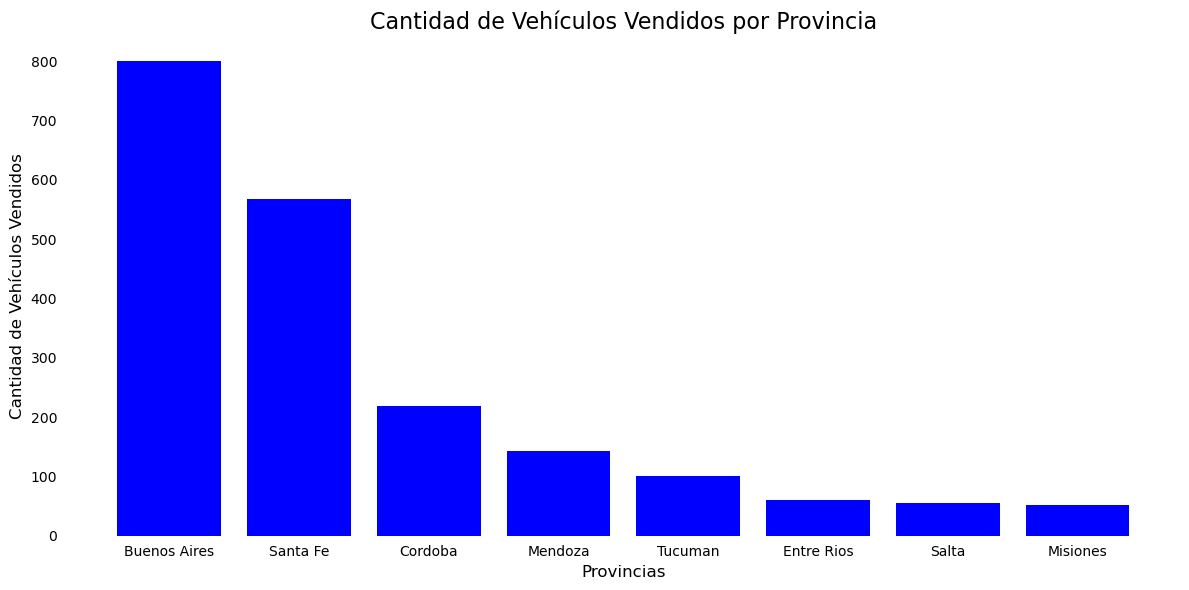

In [24]:
import matplotlib.pyplot as plt

# Ordenar los datos por cantidad de vehículos vendidos
cantidad_vehiculos_provincia = cantidad_vehiculos_provincia.sort_values(by='Cantidad', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.bar(cantidad_vehiculos_provincia['Provincia'], cantidad_vehiculos_provincia['Cantidad'], color='blue')

# Títulos y etiquetas
plt.title('Cantidad de Vehículos Vendidos por Provincia', fontsize=16, color='black')
plt.xlabel('Provincias', fontsize=12, color='black')
plt.ylabel('Cantidad de Vehículos Vendidos', fontsize=12, color='black')

# Rotar etiquetas del eje X
plt.xticks(rotation=0, fontsize=10, color='black')
plt.yticks(color='black')

# Eliminar borde y ejes
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.gca().tick_params(left=False, bottom=False)  # quitar marcas de los ejes
plt.gca().set_axisbelow(True)  # Para enviar grid detrás de las barras

# Mostrar el gráfico
plt.tight_layout()
plt.show()


3. Etapa 3: Desarrollo de consignas

3.1. Preguntas de interes

3.1.1. ¿Qué provincias concentran más ventas de vehículos nuevos y cuáles de usados?

3.1.2. ¿Qué marcas dominan los ingresos en venta de vehículos ?

3.2. Graficos y análisis

3.2.1. ¿Qué provincias concentran más ventas de vehículos nuevos y cuáles de usados?

3.2.1.1. Desarrollo Grafico

In [25]:
import pandas as pd
import plotly.express as px

# Agrupar por provincia y tipo de vehículo
df_ventas = df.groupby(['Provincia', 'Vehiculo_Nuevo']).size().reset_index(name='Cantidad_Vendida')

# Renombrar los valores de Vehiculo_Nuevo
df_ventas["Vehiculo_Nuevo"] = df_ventas["Vehiculo_Nuevo"].map({"SI": "Nuevo", "No": "Usado"})

# Calcular totales por provincia (como hacías con value_counts())
totales = df_ventas.groupby("Provincia")["Cantidad_Vendida"].sum().sort_values(ascending=False).reset_index()

# Extraer el orden correcto
orden_provincias = totales["Provincia"].tolist()

# Asignar orden categórico a la columna Provincia
df_ventas["Provincia"] = pd.Categorical(df_ventas["Provincia"], categories=orden_provincias, ordered=True)

# Reordenar el DataFrame para asegurar el orden correcto en la visualización
df_ventas = df_ventas.sort_values("Provincia")

# Definir colores
colores = {"Nuevo": "BLUE", "Usado": "RED"}

# Crear gráfico
fig = px.bar(
    df_ventas,
    x="Provincia",
    y="Cantidad_Vendida",
    color="Vehiculo_Nuevo",
    color_discrete_map=colores,
    title="Cantidad de vehículos vendidos por provincia (Nuevos vs Usados)",
    labels={
        "Cantidad_Vendida": "Cantidad de Vehículos Vendidos",
        "Provincia": "Provincia",
        "Vehiculo_Nuevo": "Tipo de Vehículo"
    },
)

# Ajustes estéticos
fig.update_layout(
    title_font_size=20,
    title_font_color='black',
    title_x=0.5,
    xaxis_tickangle=0,
    xaxis_title_font=dict(color='black'),
    yaxis_title_font=dict(color='black'),
    legend_title_font=dict(color='black', size=14),
    legend_font=dict(color='black', size=12),
    font_color='black',
    plot_bgcolor="white",
    barmode="group"
)

# Eliminar líneas de ejes
fig.update_xaxes(showline=False, showgrid=False, zeroline=False)
fig.update_yaxes(showline=False, showgrid=False, zeroline=False)

# Mostrar gráfico
fig.show()


![Gráfico de vehículos](CantidadDeVehiculosVendidosPorProvincia.jpg)

3.2.1.2. Desarrollo cuantitativo

In [26]:
# Top 3 ventas de vehículos USADOS
total_usados = df_ventas[df_ventas["Vehiculo_Nuevo"] == "Usado"]["Cantidad_Vendida"].sum()

top_usados = (
    df_ventas[df_ventas["Vehiculo_Nuevo"] == "Usado"]
    .sort_values("Cantidad_Vendida", ascending=False)
    .head(3)
    .reset_index(drop=True)
)

top_usados.index += 1  # Que arranque desde 1
top_usados["Porcentaje"] = ((top_usados["Cantidad_Vendida"] / total_usados) * 100).round(2).astype(str) + " %"

print("🔴 Top 3 provincias con más ventas de vehículos Usados:")
print(top_usados[["Provincia", "Cantidad_Vendida", "Porcentaje"]])


# Top 3 ventas de vehículos NUEVOS
total_nuevos = df_ventas[df_ventas["Vehiculo_Nuevo"] == "Nuevo"]["Cantidad_Vendida"].sum()

top_nuevos = (
    df_ventas[df_ventas["Vehiculo_Nuevo"] == "Nuevo"]
    .sort_values("Cantidad_Vendida", ascending=False)
    .head(3)
    .reset_index(drop=True)
)

top_nuevos.index += 1  # Que arranque desde 1
top_nuevos["Porcentaje"] = ((top_nuevos["Cantidad_Vendida"] / total_nuevos) * 100).round(2).astype(str) + " %"

print("\n🔵 Top 3 provincias con más ventas de vehículos Nuevos:")
print(top_nuevos[["Provincia", "Cantidad_Vendida", "Porcentaje"]])


🔴 Top 3 provincias con más ventas de vehículos Usados:
      Provincia  Cantidad_Vendida Porcentaje
1  Buenos Aires               585    41.37 %
2      Santa Fe               387    27.37 %
3       Cordoba               166    11.74 %

🔵 Top 3 provincias con más ventas de vehículos Nuevos:
      Provincia  Cantidad_Vendida Porcentaje
1  Buenos Aires               216    36.86 %
2      Santa Fe               181    30.89 %
3       Cordoba                53     9.04 %


3.2.1.3. Desarrollo Conclusion

El análisis de las ventas de vehículos en las distintas provincias muestra que:

Vehículos Usados:

-Buenos Aires lidera ampliamente el mercado de vehículos usados, con 585 unidades vendidas, lo que representa un 41.37% del total nacional de este tipo de vehículo. Le sigue Santa Fe, con 387 unidades, equivalente al 27.37%; y Córdoba ocupa el tercer lugar con 166 unidades, lo que representa un 11.74%.
    
-Esto indica que Buenos Aires concentra por sí sola más del 40% de las ventas de usados, mostrando una fuerte preferencia por el mercado de segunda mano en esa provincia.

Vehículos Nuevos:

-También en el mercado de vehículos nuevos, Buenos Aires encabeza las ventas con 216 unidades, representando un 36.86% del total. En segundo lugar se encuentra Santa Fe con 181 unidades (30.89%); seguida por Córdoba, con 53 unidades (9.04%).
    
-Aunque Buenos Aires sigue liderando, la diferencia con Santa Fe es menos marcada en el caso de vehículos nuevos, lo que sugiere una distribución algo más equilibrada entre ambas provincias para este segmento.

3.2.2. ¿Qué marcas dominan los ingresos en vehículos nuevos vs usados?

3.2.2.1. Desarrollo Grafico

In [27]:
import pandas as pd
import plotly.express as px

# Leer archivo
df = pd.read_csv('ProyectoVentaVehiculos+Milanesio.csv', delimiter=';')

# Asegurar que Fecha_Venta sea datetime
df["Fecha_Venta"] = pd.to_datetime(df["Fecha_Venta"], dayfirst=True)

# Convertir Precio_USD a float (reemplazar coma por punto)
df["Precio_USD"] = df["Precio_USD"].str.replace(",", ".").astype(float)

# Crear columna de trimestre
df["Trimestre"] = df["Fecha_Venta"].dt.to_period("Q").astype(str)

# Agrupar ingresos por Marca y Trimestre
df_ingresos = (
    df.groupby(["Trimestre", "Marca"])["Precio_USD"]
    .sum()
    .reset_index()
    .rename(columns={"Precio_USD": "Ingresos"})
)

# Crear gráfico de líneas
fig = px.line(
    df_ingresos,
    x="Trimestre",
    y="Ingresos",
    color="Marca",
    title="Evolución de ingresos por marca (por trimestre)",
    markers=True
)

# Ajustes visuales
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title="Trimestre",
    yaxis_title="Ingresos en USD",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font_color="black",
)

fig.show()


![Gráfico de ingresos](EvolucionDeIngresosPorMarca.jpg)

In [30]:
!jupyter nbconvert --to html --embed-images ProyectoVentaVehiculos+Milanesio.ipynb

[NbConvertApp] Converting notebook ProyectoVentaVehiculos+Milanesio.ipynb to html
C:\Users\nacho\anaconda3\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
C:\Users\nacho\anaconda3\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 458291 bytes to ProyectoVentaVehiculos+Milanesio.html


3.2.2.2 Desarrollo Cuantitativo

In [28]:
# Ingresos por marca en millones de USD
ingresos_por_marca = (
    df.groupby("Marca")["Precio_USD"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Convertir a millones y redondear
ingresos_por_marca["Ingresos (M USD)"] = (ingresos_por_marca["Precio_USD"] / 1e6).round(2)

# Eliminar columna original si no la necesitas
ingresos_por_marca = ingresos_por_marca.drop(columns="Precio_USD")

print(" Ranking de marcas por ingresos totales (en millones de USD):")
print(ingresos_por_marca)

# Extraer marca top
marca_top = ingresos_por_marca.iloc[0]["Marca"]
print(f"\n La marca que más ingresos generó fue: {marca_top}")



 Ranking de marcas por ingresos totales (en millones de USD):
           Marca  Ingresos (M USD)
0      Chevrolet             14.17
1         Toyota             14.06
2  Mercedes-Benz             13.85
3     Volkswagen             13.72
4           Ford             13.61
5           Fiat             12.80
6        Renault             12.67
7         Nissan             12.26

 La marca que más ingresos generó fue: Chevrolet


In [29]:
# Filtrar solo datos de la marca top
df_top_marca = df[df["Marca"] == marca_top]

# Agrupar ingresos por tipo de vehículo
ranking_tipo_vehiculo = (
    df_top_marca.groupby("Tipo_Vehiculo")["Precio_USD"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Convertir ingresos a millones y renombrar columna
ranking_tipo_vehiculo["Ingresos (M USD)"] = (ranking_tipo_vehiculo["Precio_USD"] / 1e6).round(2)

# Calcular porcentaje
total_ingresos_marca = ranking_tipo_vehiculo["Precio_USD"].sum()
ranking_tipo_vehiculo["Porcentaje"] = (
    (ranking_tipo_vehiculo["Precio_USD"] / total_ingresos_marca) * 100
).round(2).astype(str) + " %"

# Eliminar columna original
ranking_tipo_vehiculo = ranking_tipo_vehiculo.drop(columns="Precio_USD")

# Mostrar solo top 3
ranking_top3 = ranking_tipo_vehiculo.head(3)

# Mostrar resultado
print(f"\n Top 3 tipos de vehículos dentro de la marca {marca_top}:")
print(ranking_top3)




 Top 3 tipos de vehículos dentro de la marca Chevrolet:
  Tipo_Vehiculo  Ingresos (M USD) Porcentaje
0          Auto              5.49    38.73 %
1     Camioneta              3.80     26.8 %
2        Trafic              2.10    14.82 %


3.2.2.2 Desarrollo Conclusion

Conclusión del análisis de ingresos por marca y tipo de vehículo:

-Chevrolet lidera el mercado en términos de ingresos por ventas de vehículos, con un total de aproximadamente 14.17 millones de USD. Esto la posiciona como la marca que más ingresos generó, seguida muy de cerca por Toyota y Mercedes-Benz.

-Dentro de Chevrolet, el tipo de vehículo que más ingresos aportó fue el Auto, con 5.49 millones de USD, lo que representa casi el 39% de los ingresos totales de la marca.

-Le siguen: Camioneta, con 3.80 millones USD (26.8% del total); y Trafic, con 2.10 millones USD (14.82% del total).

La estrategia comercial de Chevrolet parece estar fuertemente apalancada en la venta de autos particulares, ya que representan el mayor volumen de ingresos. Las camionetas y vehículos utilitarios como el Trafic también son relevantes, pero con menor impacto en comparación.

-----------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------

DESARROLLO PARTE 2

i. Feature selection para reducir la dimensionalidad

- Carga y preprocesamiento del dataset:

Se importan librerías necesarias.

Se convierte el separador decimal de coma a punto.

Se eliminan columnas irrelevantes (ID_Venta, Fecha_Venta) y se convierte Vehiculo_Nuevo a binario.

Se realiza one-hot encoding sobre variables categóricas.

- Análisis exploratorio:

Se genera un countplot de la variable objetivo Vehiculo_Nuevo.

Se genera una matriz de correlación entre variables numéricas.

- Feature Selection:

Se discretizan variables numéricas con KBinsDiscretizer.

Se aplica SelectKBest con chi² para obtener las 10 variables más influyentes.

Se grafica el ranking de las variables seleccionadas.

In [63]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")

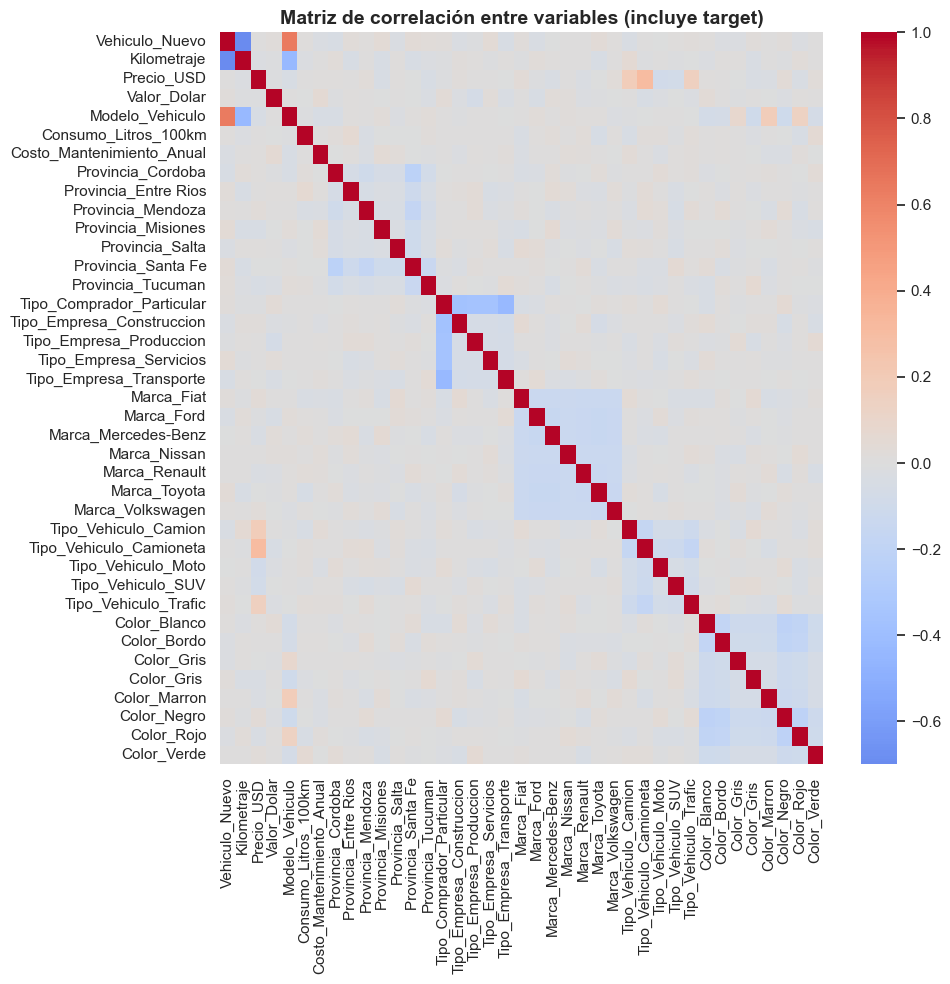

c:\Users\nacho\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\nacho\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


Top 10 variables seleccionadas por Chi2:
                      Feature   Chi2_Score
0                 Kilometraje  2320.792079
3             Modelo_Vehiculo  1267.088688
9          Provincia_Misiones     3.084307
16     Tipo_Empresa_Servicios     2.879253
6           Provincia_Cordoba     2.748792
17    Tipo_Empresa_Transporte     2.577910
5   Costo_Mantenimiento_Anual     2.266194
25       Tipo_Vehiculo_Camion     2.189253
19                 Marca_Ford     1.821974
11         Provincia_Santa Fe     1.805682


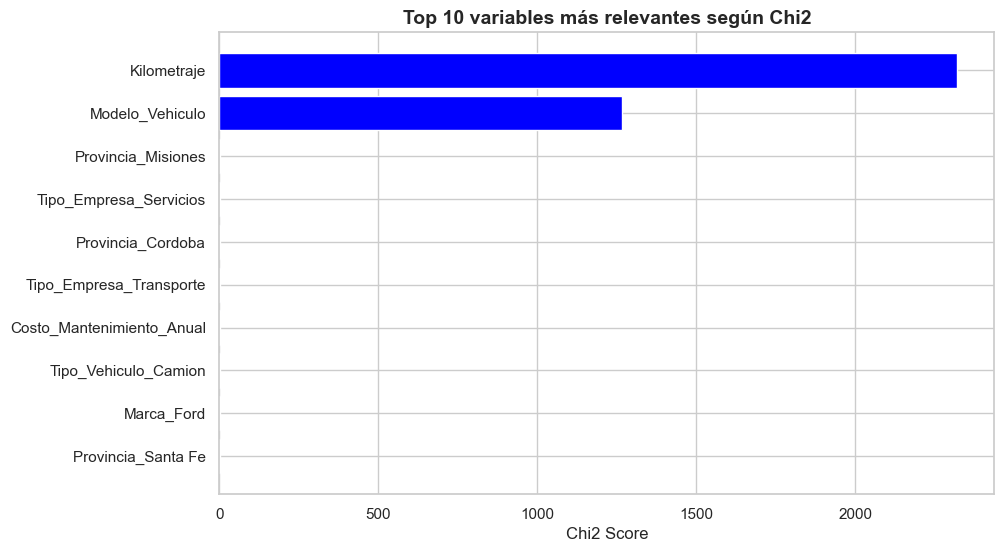

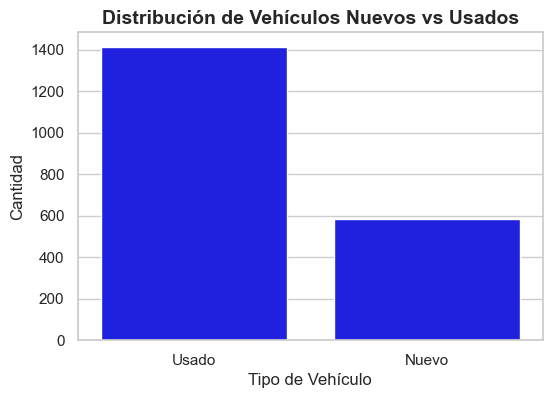

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt

#  Cargar CSV y convertir decimales con coma a punto 
df = pd.read_csv('ProyectoVentaVehiculos+Milanesio.csv', delimiter=';')

decimal_cols = [
    'Precio_USD', 'Valor_Dolar',
    'Consumo_Litros_100km', 'Costo_Mantenimiento_Anual'
]

for col in decimal_cols:
    df[col] = (
        df[col]
        .str.replace('.', '', regex=False)     
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

# Limpieza mínima y mapeo del target 
df = df.drop(columns=['ID_Venta', 'Fecha_Venta'])
df['Vehiculo_Nuevo'] = df['Vehiculo_Nuevo'].str.upper().map({'SI': 1, 'NO': 0})

# Eliminar filas sin target
df = df.dropna(subset=['Vehiculo_Nuevo'])

#  categóricas 
df_dummies = pd.get_dummies(df, drop_first=True)
X = df_dummies.drop(columns='Vehiculo_Nuevo')
y = df_dummies['Vehiculo_Nuevo']



# Correlación entre variables numéricas grafico 1
correlation_matrix = df_dummies.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables (incluye target)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



# Discretizar todas las numéricas con KBinsDiscretizer 
num_cols = X.select_dtypes(include=[np.number]).columns

kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_binned = kbd.fit_transform(X[num_cols])

X_binned = pd.DataFrame(X_binned, columns=num_cols, index=X.index).astype(int)

# Reunir dummies + variables binned
X_final = pd.concat([X_binned, X.drop(columns=num_cols)], axis=1)

# Quitar columnas que sigan siendo constantes 
X_final = X_final.loc[:, X_final.nunique() > 1]

# SelectKBest con Chi-cuadrado
k_best = min(10, X_final.shape[1])           
selector = SelectKBest(chi2, k=k_best)
selector.fit(X_final, y)

scores = (
    pd.DataFrame({'Feature': X_final.columns,
                  'Chi2_Score': selector.scores_})
    .sort_values(by='Chi2_Score', ascending=False)
)

top10 = scores.head(10)
print("Top 10 variables seleccionadas por Chi2:")
print(top10)

# Gráfico 2
plt.figure(figsize=(10, 6))
plt.barh(top10['Feature'][::-1], top10['Chi2_Score'][::-1], color='blue')
plt.xlabel('Chi2 Score')
plt.title('Top 10 variables más relevantes según Chi2', fontsize=14, fontweight='bold')
plt.show()




# Grafico 3
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Vehiculo_Nuevo', color='blue')
plt.title("Distribución de Vehículos Nuevos vs Usados", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de Vehículo", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks([0, 1], ["Usado", "Nuevo"], fontsize=11)
plt.show()



Este resultado representa las 10 variables independientes más relevantes para predecir si un vehículo es nuevo o usado (Vehiculo_Nuevo) según el test chi-cuadrado (χ²) aplicado a variables discretizadas. Los vehículos con más kilometraje tienden fuertemente a ser usados; es la variable más determinante y la distribución está desbalanceada, con más vehículos usados que nuevos.

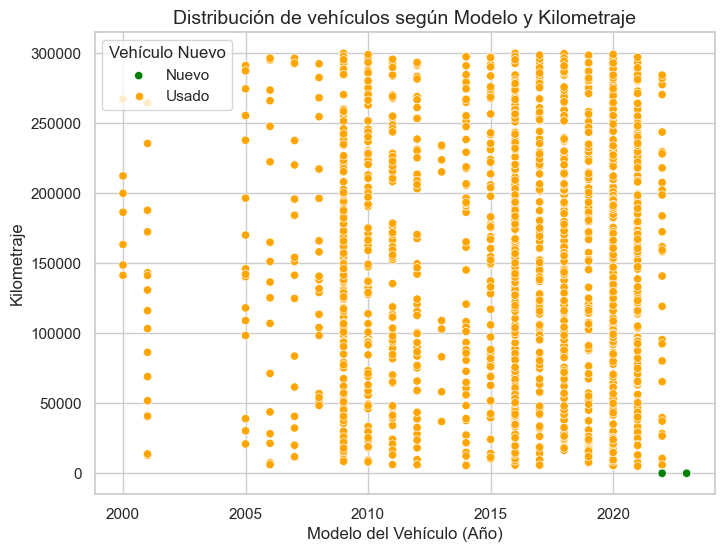

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Modelo_Vehiculo",
    y="Kilometraje",
    hue="Vehiculo_Nuevo",
    palette=["orange", "green"]
)
plt.title("Distribución de vehículos según Modelo y Kilometraje", fontsize=14)
plt.xlabel("Modelo del Vehículo (Año)")
plt.ylabel("Kilometraje")
plt.legend(title="Vehículo Nuevo", labels=["Nuevo", "Usado"])
plt.grid(True)
plt.show()

Contexto de los vehiculos nuevos y usados conforme a las dos variables mas relevantes segun resultados de Chi2

-----------------------------------------------------------------------------------------------------------------------------------

ii y iii. Algoritmo clasificación para entrenar y calculo de metricas para validad el modelo

- Se prueban dos modelos de clasificación:

LogisticRegression

RandomForestClassifier

- Se evalúan con:

Accuracy

Classification report

Matriz de confusión

Curva ROC/AUC

Validación cruzada (cross_val_score)

c:\Users\nacho\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\nacho\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(



Modelo: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.99      1.00      1.00       117

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



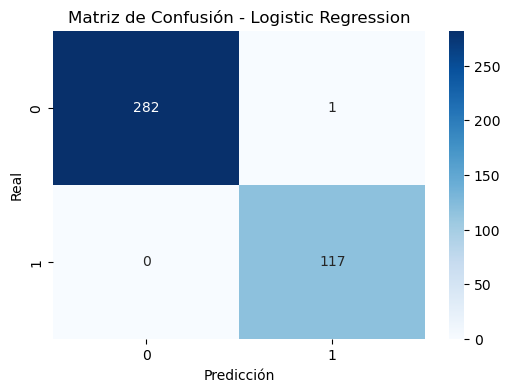


Modelo: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      1.00      1.00       117

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



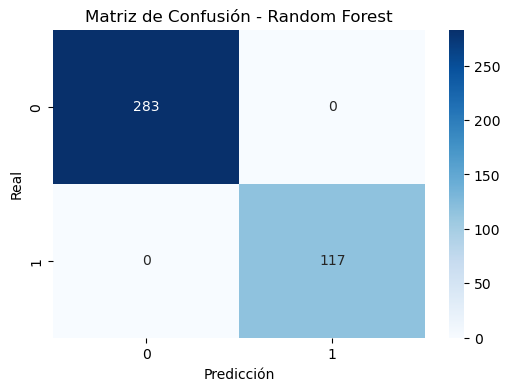


Modelo: Logistic Regression
Accuracy en cada fold: [0.9925 1.     0.995  1.     0.99  ]
Accuracy promedio: 0.9955
Desviación estándar: 0.0040

Modelo: Random Forest
Accuracy en cada fold: [1.     1.     1.     1.     0.9975]
Accuracy promedio: 0.9995
Desviación estándar: 0.0010


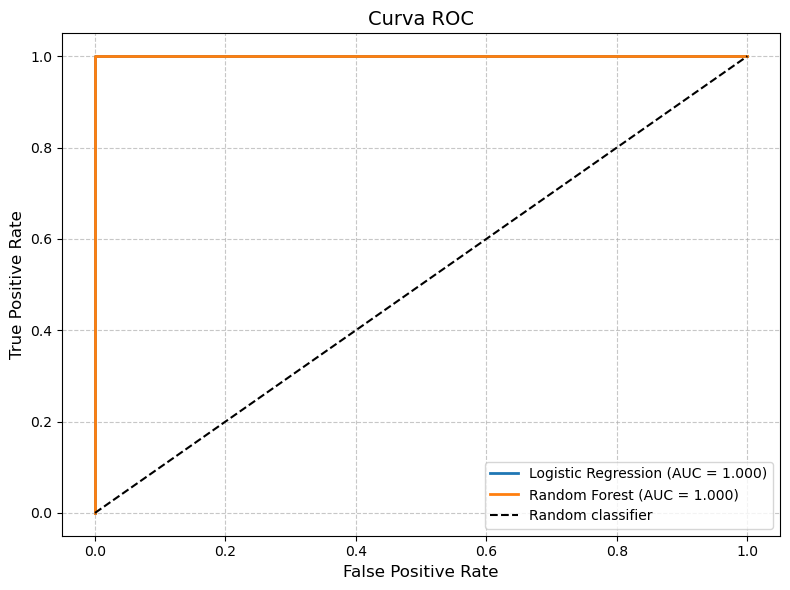

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables predictoras y objetivo
y = df['Vehiculo_Nuevo'].copy()
X = df.drop(columns='Vehiculo_Nuevo')

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Eliminar columnas constantes
X_encoded = X_encoded.loc[:, X_encoded.nunique() > 1]
y = y.loc[X_encoded.index]

# Discretizar variables numéricas
numeric_cols = X_encoded.select_dtypes(include=[np.number]).columns
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_binned = kbd.fit_transform(X_encoded[numeric_cols])
X_binned = pd.DataFrame(X_binned, columns=numeric_cols, index=X_encoded.index).astype(int)

# Combinar con categóricas
X_discretized = pd.concat([X_binned, X_encoded.drop(columns=numeric_cols)], axis=1)

# Selección de variables
k_best = min(10, X_discretized.shape[1])
selector = SelectKBest(score_func=chi2, k=k_best)
selector.fit(X_discretized, y)
selected_features = X_discretized.columns[selector.get_support()]
X_selected = X_discretized[selected_features]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Modelos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()



# Validación cruzada
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_selected, y, cv=5, scoring='accuracy')
    print(f"\nModelo: {nombre}")
    print(f"Accuracy en cada fold: {np.round(scores, 4)}")
    print(f"Accuracy promedio: {scores.mean():.4f}")
    print(f"Desviación estándar: {scores.std():.4f}")



#AUC/ROc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))  # Tamaño del gráfico

for nombre, modelo in modelos.items():
    y_score = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{nombre} (AUC = {auc_score:.3f})')

# Línea base
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random classifier')

# Personalización
plt.title('Curva ROC', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------

iv. Conclusiones con base en los resultados obtenidos

- Se discuten las variables más influyentes.

- Se comparan los modelos.

- Se proponen aplicaciones prácticas del modelo en un contexto comercial.

Conforme a los resultado:

- Clase 0 (posiblemente "No compró vehículo nuevo"): El modelo identificó todos correctamente.

- Clase 1 (posiblemente "Sí compró vehículo nuevo"): El modelo se equivocó muy poco (precision de 0.99), pero detectó todos los casos positivos (recall 1.00).


Esto significa que ambos modelos predicen perfectamente (o casi perfectamente) los datos de prueba y esto significa que el modelo es realmente bueno, debido a que los datos contienen variables muy predictivas para saber si alguien compra un vehículo nuevo.

Modelo: Logistic Regression
Accuracy en cada fold: [0.9925, 1, 0.995, 1, 0.99]

Esto indica el rendimiento (precisión) del modelo en cada uno de los 5 subconjuntos en que se dividió el dataset.

Todos los valores están muy cerca de 1 (o 100%), lo que muestra un rendimiento altamente consistente.

Accuracy promedio: 0.9955

El promedio de las precisiones anteriores: el modelo acierta aproximadamente el 99.55% de las veces.

Desviación estándar: 0.0040

Mide la variabilidad entre los resultados de los folds.

Cuanto más baja, más consistente es el modelo. En este caso, la variabilidad es muy baja.

Modelo: Random Forest
Accuracy en cada fold: [1, 1, 1, 1, 0.9975]

El modelo tuvo un rendimiento casi perfecto, con solo un fold levemente por debajo del 100%.

Accuracy promedio: 0.9995

Precisión media del 99.95%, lo cual es altísimo.

Desviación estándar: 0.0010

La variabilidad es incluso más baja que en el modelo anterior, lo que indica un modelo muy robusto y estable.



De esta forma concluimos que las variables más influyentes en la predicción de un vehículo nuevo fueron: Kilometraje y Modelo_Vehiculo

Ambos modelos alcanzaron precisiones cercanas al 100%, lo que sugiere un conjunto de datos altamente separable. Sin embargo, esto se debe a patrones muy definidos (e.g., los vehículos nuevos tienen casi siempre 0 km).

El modelo Random Forest tuvo una leve ventaja en estabilidad (menor desviación en la validación cruzada).

Aplicación práctica:

Las concesionarias podrían usar estos modelos para segmentar compradores potenciales de autos nuevos, optimizando estrategias de marketing según características como el kilometraje o la marca preferida.

También podrían predecir el tipo de venta esperada (nuevo/usado) en función del perfil del vehículo ofrecido, ajustando sus promociones y campañas.

Recomendaciones:

Es fundamental aplicar técnicas de balanceo de clases (como SMOTE) para futuros entrenamientos.

